# Simulation de Percussion 1D

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image

Ce notebook simule la percussion entre deux floes. Le deuxième floe reste encastré dans le premier après la collision (voir image ci-bas). Les détails de la modélisation sont dans le rapport de stage. Pour simplifier les écritures, les variables $m'$, $k'$, et $\mu'$ sont notées respectivement $m_{-}$, $k_{-}$, et $\mu_{-}$.

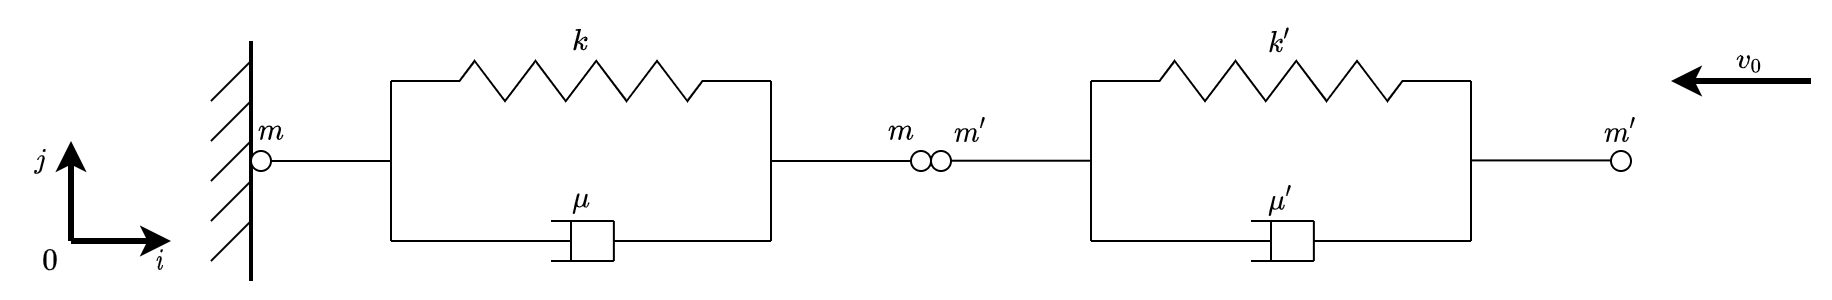

In [2]:
Image("./Percussion1D-Systeme.png")

## Interactive plot

Observons un plot interactif dans lesquel on pourra faire varier les paramètres du modèle. Il faudra installer le package [Bokeh](https://bokeh.org/) pour que ca fonctionne.

In [3]:
from ipywidgets import interact

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [4]:
N = 1000
tmax = 5
t = np.linspace(0,tmax, N+1)
Y = np.zeros(shape=(N+1, 6))

p = figure(title="Plot des déplacements et vitesses", plot_height=500, plot_width=1000, y_range=(-1,1),
           background_fill_color='#efefef')
x1 = p.line(t, Y[:,0], color="blue", line_width=1.5, alpha=0.8, legend_label='x₁')
x2 = p.line(t, Y[:,1], color="orange", line_width=1.5, alpha=0.8, legend_label='x₂')
x3 = p.line(t, Y[:,2], color="violet", line_width=1.5, alpha=0.8, legend_label='x₃')

x1dot = p.line(t, Y[:,3], color="green", line_width=1.5, alpha=0.8, legend_label='ẋ₁')
x2dot = p.line(t, Y[:,4], color="red", line_width=1.5, alpha=0.8, legend_label='ẋ₂')
x3dot = p.line(t, Y[:,5], color="black", line_width=1.5, alpha=0.8, legend_label='ẋ₃')


# p.legend.visible = False
p.legend.label_text_font_style = "italic"

In [5]:
def update(m=1.0, m_=1.0, k=3.0, k_=22.0, mu=6.0, mu_=2.0, v0=0, v_0=1.8, tmax=5.0):
    E = np.array([[0,0,0, 1.0,0, 0], 
                  [0,0,0,0, 1.0, 0], 
                  [0,0,0,0, 0, 1.0], 
                  [-k/m, k/m, 0, -mu/m, mu_/m, 0], 
                  [k/(m+m_), (-k-k_)/(m+m_), k/(m+m_),  mu_/(m+m_), (-mu-mu_)/(m+m_), mu_/(m+m_)], 
                  [0, k_/m_, -k_/m_,  0, mu_/m_, -mu_/m_]])
    vf = (m*v0 - m_*v_0)/(m + m_)
    Y0 = np.array([0,0, 0, vf, vf, vf])
    t = np.linspace(0, tmax, N+1)
    
    def model(Y, t):
        return E @ Y
    Y = odeint(model, Y0, t)
    
    x1.data_source.data['y'] = Y[:,0]
    x2.data_source.data['y'] = Y[:,1]
    x3.data_source.data['y'] = Y[:,2]
    x1dot.data_source.data['y'] = Y[:,3]
    x2dot.data_source.data['y'] = Y[:,4]
    x3dot.data_source.data['y'] = Y[:,5]
    
    print("\nY final:", Y[-1])
    
    push_notebook()

In [6]:
show(p, notebook_handle=True)

In [7]:
interact(update, m=(-0,10,0.1), m_=(-0,10,0.1), 
         k=(-0,30,0.1), k_=(-0,30,0.1), 
         mu=(-0,10,0.1), mu_=(-0,10,0.1), 
         v0=(-5,5,0.1), v_0=(-5,5,0.1), tmax=(0,32,1));

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0), FloatSlider(value=1.0, description='m…

En somme, le dispositif visqueux et ses constantes $\mu$ et $\mu'$, permettent de dissiper l'énergie du système. Le système ralentit et évolue vers un état d'équilibre $Y_{eq} = (0,0,0,0)$. Les variables les plus influentes sur la convergence du système sont effectivenent $\mu$ et $\mu'$. Si $\mu$ est trop fort, le système diverge; et si $\mu'$ est trop faible, le système diverge.